In [24]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [25]:
mut_alleles = pd.read_csv('../data_obtain/allel_mutspec_12comp.csv', index_col = 0)

In [26]:
mut_alleles.head()

,allel,n_subtree,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,sum_mutations
0,5161Ser,0,0.008204,0.069156,0.014245,0.007952,0.002325,0.365963,0.070945,0.002271,0.040595,0.013497,0.368526,0.036321,369947
0,5161Ser,1,0.000000,0.059908,0.023041,0.000000,0.000000,0.400922,0.050691,0.000000,0.023041,0.018433,0.396313,0.027650,217
0,4825Gly,0,0.008198,0.069148,0.014248,0.007947,0.002323,0.365978,0.070930,0.002269,0.040589,0.013500,0.368546,0.036324,370222
0,4499Ile,0,0.008201,0.069139,0.014254,0.007950,0.002324,0.365986,0.070939,0.002267,0.040602,0.013497,0.368512,0.036330,370080
0,4477Glu,0,0.008187,0.069166,0.014248,0.007950,0.002324,0.365950,0.070949,0.002270,0.040575,0.013500,0.368558,0.036324,370083


In [27]:
mut_alleles['al_stnum'] = mut_alleles['allel'].astype(str) + '_' + mut_alleles['n_subtree'].astype(str)

## Compare allel mutspecs with general

In [28]:
mut_general = pd.read_csv('../data/u_mutation_dists.filtered.csv', index_col=0)

C:\Users\voron\AppData\Local\Temp\ipykernel_4052\2738904014.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  mut_general = pd.read_csv('../data/u_mutation_dists.filtered.csv', index_col=0)


In [29]:
mut_general.head()

,mut_id,pos,parent_nucl,child_nucl,parent_nucl_context,child_nucl_context,parent_node,child_node,topology_dist,GenName,CodonNumber,NucInCodon,RefCodon,AltCodon,NeighL,NeighR,RefAa,AltAa,AaSub
0,0,1087,G,A,gtGtt,gtAtt,#54520#,#54519#,0,ORF1ab,274.0,3,GUG,GUA,U,U,Val,Val,FF
1,1,3677,U,C,atTtt,atCtt,#54520#,#54519#,0,ORF1ab,1138.0,1,UUU,CUU,U,U,Phe,Leu,NS
2,2,7119,C,U,ttCta,ttTta,#54520#,#54519#,0,ORF1ab,2285.0,2,UCU,UUU,U,U,Ser,Phe,NS
3,3,9565,C,U,ttCtt,ttTtt,#54520#,#54519#,0,ORF1ab,3100.0,3,UUC,UUU,U,U,Phe,Phe,S
4,4,10323,A,G,taAgg,taGgg,#54520#,#54519#,0,ORF1ab,3353.0,2,AAG,AGG,A,A,Lys,Arg,NS


In [30]:
mut_general = mut_general[mut_general['AaSub'].isin(['S', 'FF'])]

I will take only non synonimus mutations

In [31]:
mut_general['mut'] = mut_general['parent_nucl'] + '>' + mut_general['child_nucl']

In [32]:
general_mutspec = mut_general.groupby(['mut'])['GenName'].count().to_frame(name=None)

C:\Users\voron\AppData\Local\Temp\ipykernel_4052\1667529630.py:1: FutureWarning: Explicitly passing `name=None` currently preserves the Series' name or uses a default name of 0. This behaviour is deprecated, and in the future `None` will be used as the name of the resulting DataFrame column.
  general_mutspec = mut_general.groupby(['mut'])['GenName'].count().to_frame(name=None)


In [33]:
general_mutspec['GenName'] = general_mutspec['GenName']/sum(general_mutspec['GenName'])

In [34]:
general_mutspec = general_mutspec.pivot_table(columns='mut')

In [35]:
general_mutspec

mut,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G
GenName,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.0135,0.368554,0.036323


In [36]:
df_for_dendro = mut_alleles.drop(['allel', 'n_subtree', 'sum_mutations'],axis=1)
df_for_dendro.head()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
0,0.008204,0.069156,0.014245,0.007952,0.002325,0.365963,0.070945,0.002271,0.040595,0.013497,0.368526,0.036321,5161Ser_0
0,0.000000,0.059908,0.023041,0.000000,0.000000,0.400922,0.050691,0.000000,0.023041,0.018433,0.396313,0.027650,5161Ser_1
0,0.008198,0.069148,0.014248,0.007947,0.002323,0.365978,0.070930,0.002269,0.040589,0.013500,0.368546,0.036324,4825Gly_0
0,0.008201,0.069139,0.014254,0.007950,0.002324,0.365986,0.070939,0.002267,0.040602,0.013497,0.368512,0.036330,4499Ile_0
0,0.008187,0.069166,0.014248,0.007950,0.002324,0.365950,0.070949,0.002270,0.040575,0.013500,0.368558,0.036324,4477Glu_0


In [37]:
general_mutspec = general_mutspec.reset_index(drop=True)
general_mutspec = general_mutspec.rename_axis(None, axis=1)
general_mutspec['al_stnum'] = 1
general_mutspec.head()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
0,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.0135,0.368554,0.036323,1


In [38]:
df_for_dendro = df_for_dendro.append(general_mutspec, ignore_index = True)

C:\Users\voron\AppData\Local\Temp\ipykernel_4052\3235207286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_for_dendro = df_for_dendro.append(general_mutspec, ignore_index = True)


In [39]:
df_for_dendro.tail()

,A>C,A>G,A>U,C>A,C>G,C>U,G>A,G>C,G>U,U>A,U>C,U>G,al_stnum
1274,0.004706,0.050695,0.012834,0.004920,0.001283,0.405134,0.054545,0.001070,0.028449,0.012193,0.399358,0.024813,4478Thr_11
1275,0.008189,0.069178,0.014241,0.007938,0.002324,0.365948,0.070956,0.002270,0.040579,0.013492,0.368572,0.036312,5273Val_0
1276,0.008189,0.069147,0.014240,0.007946,0.002325,0.366041,0.070926,0.002271,0.040590,0.013494,0.368498,0.036332,4794Leu_0
1277,0.008198,0.069147,0.014248,0.007946,0.002323,0.365977,0.070927,0.002269,0.040591,0.013500,0.368551,0.036324,5288Leu_0
1278,0.008198,0.069146,0.014248,0.007946,0.002323,0.365974,0.070929,0.002269,0.040591,0.013500,0.368554,0.036323,1


In [40]:
pca_only = df_for_dendro
pca_only.loc[pca_only['al_stnum'] != 1,'al_stnum'] = 0

In [41]:
allel_char = pca_only['al_stnum']
pca_data_only = pca_only.drop('al_stnum', axis=1)

In [42]:
pca = PCA()
pca_data = pca.fit_transform(pca_data_only)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(pca_data_only.columns))])

In [43]:
pca_data1 = pca_data[["pc1","pc2"]].copy()

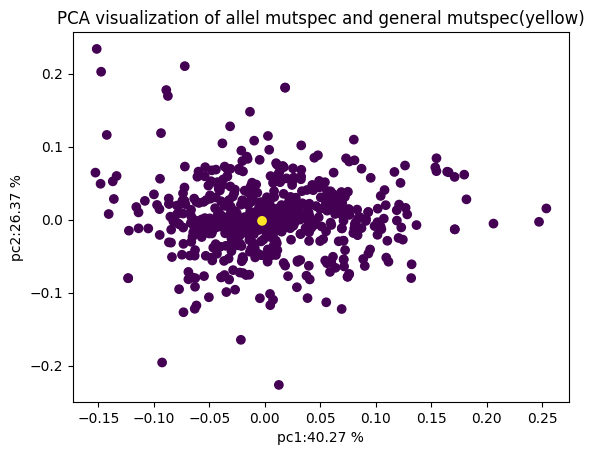

In [44]:
plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=pca_only.al_stnum)
plt.title("PCA visualization of allel mutspec and general mutspec(yellow)")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

<Figure size 1500x800 with 0 Axes>

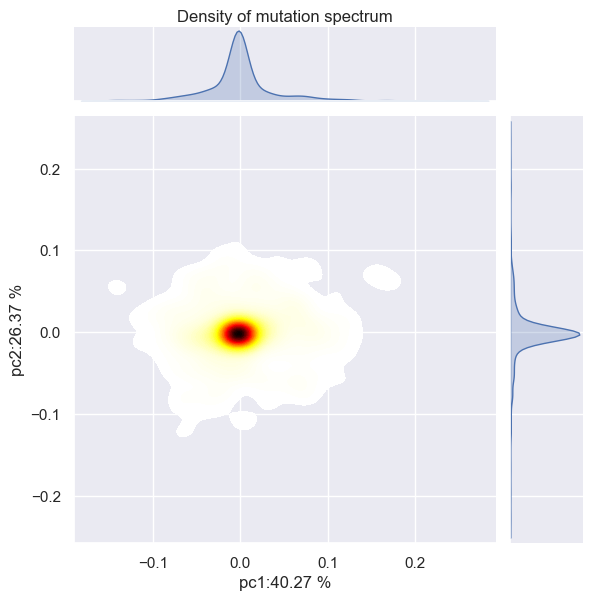

In [67]:
plt.figure(figsize=(15,8))
sns.jointplot(x=pca_data1["pc1"], y=pca_data1["pc2"], kind='kde', cmap='hot_r', n_levels=100, fill=True)
plt.title("Density of mutation spectrum", x=0.5, y=1.2)
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

## Hierarchical clustering

In [141]:
varieties = list(df_for_dendro.pop('al_stnum'))
samples = df_for_dendro.values

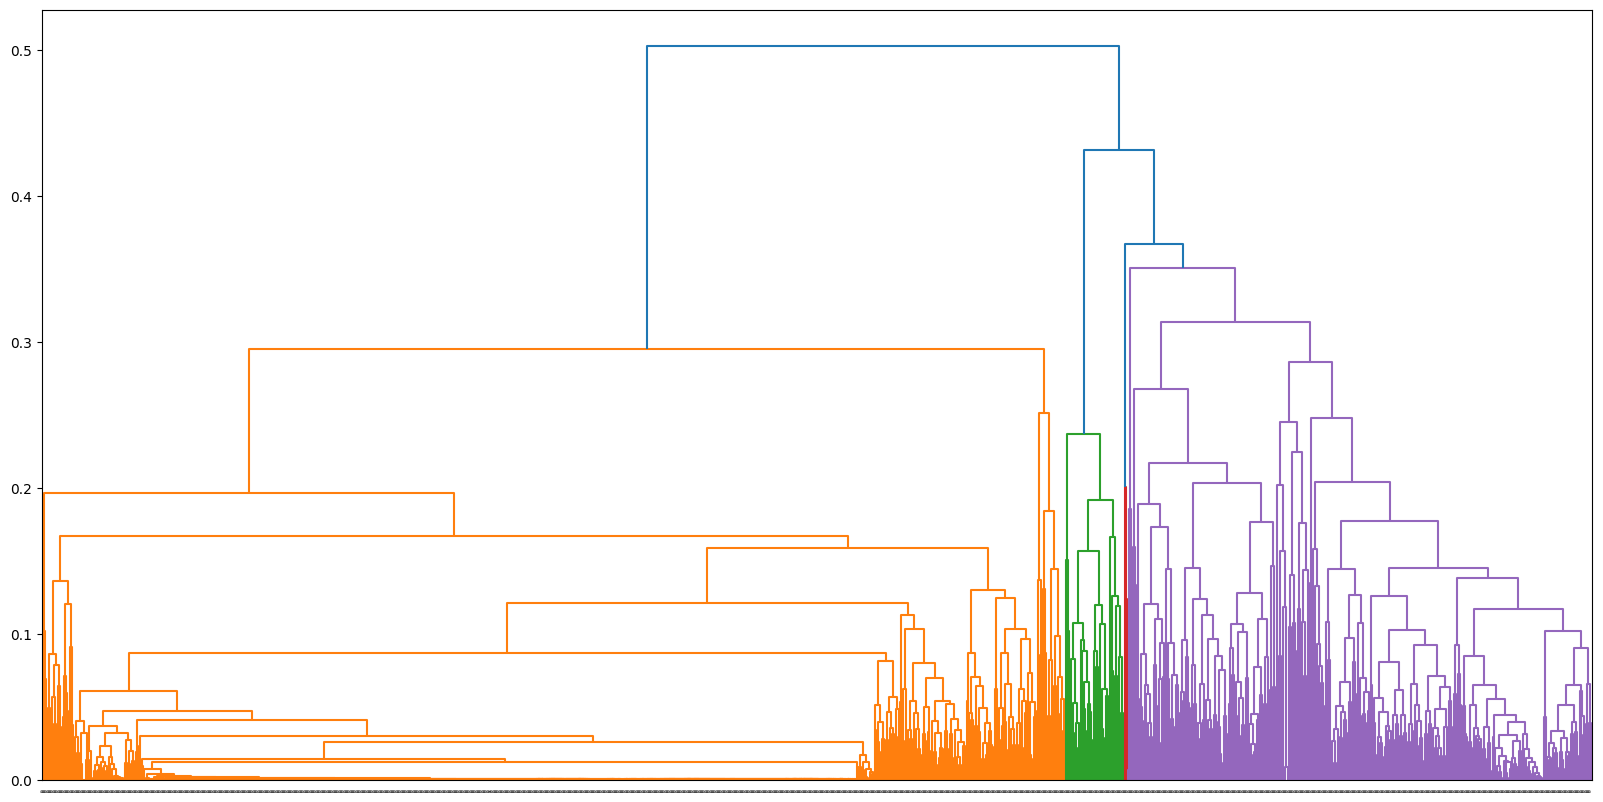

In [142]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')
plt.figure(figsize=(20,10))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=3,
           )

plt.show()
plt.close()

## KMEANS without teacher

In [143]:
df_for_dendro = mut_alleles.drop(['allel', 'n_subtree', 'sum_mutations'],axis=1)
data = df_for_dendro.drop('al_stnum',axis=1)
pca = PCA()
pca_data = pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(data.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

pca.explained variance ratio:
  0.403 0.264 0.146 0.054 0.046 0.040 0.021 0.009 0.008 0.006 0.003 0.000


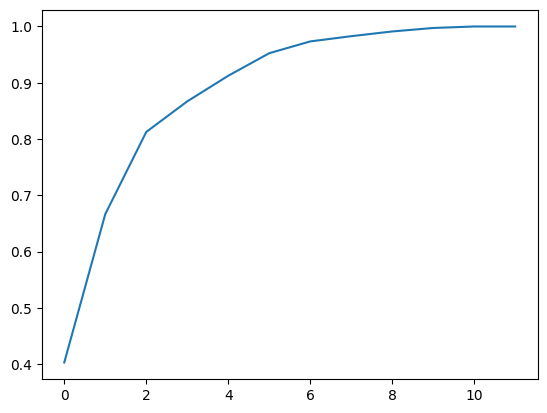

In [144]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Может быть объяснено примерно 4 компонентами

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

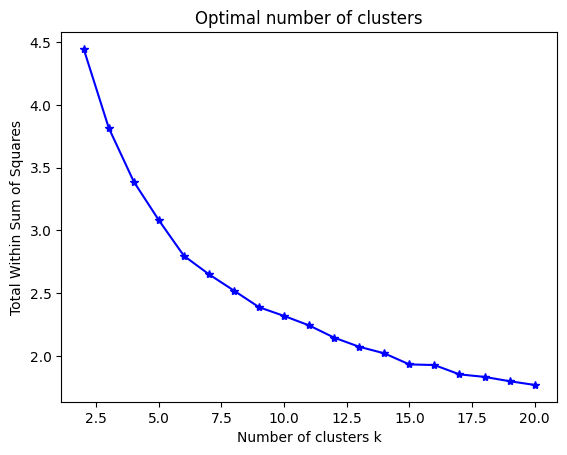

In [145]:
wss = []

K = range(2,21)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

In [146]:
def find_optimal_cluster_number_kmeans(data, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(data) 
        silhouette_score = metrics.silhouette_score(data, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [147]:
find_optimal_cluster_number_kmeans(data, 2, 20, random_state=123)

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

n_clusters = 2 The average silhouette_score is : 0.5487


C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Take n_clusters as 2

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


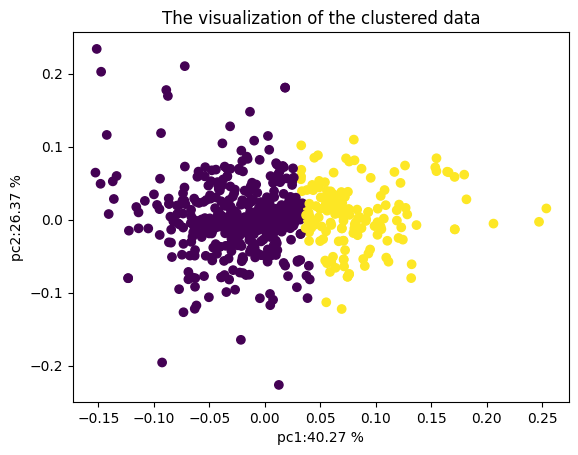

In [148]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=2, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

C:\Users\voron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


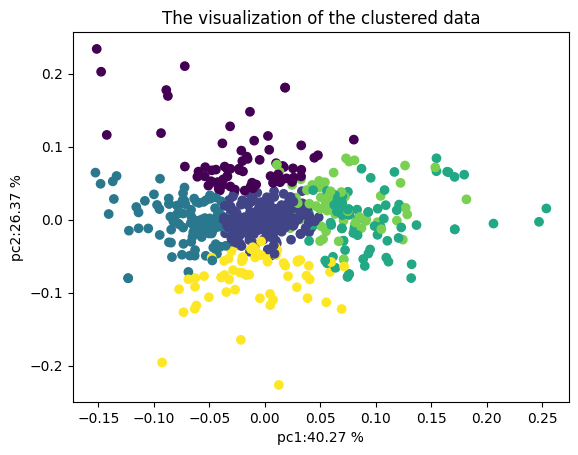

In [149]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=6, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

## DBSCAN

In [150]:
epsilon = np.arange(0.01,0.12,0.01)
min_samples = [4,5,6,7,8,9,10,15,20,25]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(data)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = metrics.silhouette_score(data, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 0.11 
min_sample= 8 
number of clusters= 1 
average silhouette score= 0.7267


In [151]:
db = DBSCAN(eps=0.11, min_samples=8).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, labels))

Estimated number of clusters: 1
Estimated number of noise points: 13
Silhouette Coefficient: 0.727


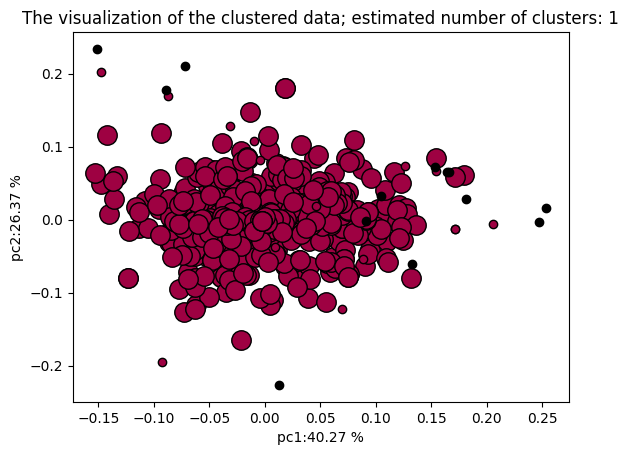

In [152]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_data1[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca_data1[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('The visualization of the clustered data; estimated number of clusters: %d' % n_clusters_)
plt.xlabel("pc1:"+"{:.2f}".format(pca.explained_variance_ratio_[0]*100)+" %")
plt.ylabel("pc2:"+"{:.2f}".format(pca.explained_variance_ratio_[1]*100)+" %")
plt.show()